In [172]:
import pickle
import joblib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

## PCA

In [89]:
breast = load_breast_cancer()

In [5]:
breast_data = breast.data

In [7]:
breast_data.shape

(569, 30)

In [32]:
labels = np.reshape(breast.target, (-1, 1))
labels.shape

(569, 1)

In [37]:
final_breast_data = np.concatenate([breast_data, labels], axis=1)

In [38]:
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
features = breast.feature_names

In [49]:
print("Before:", breast_dataset.columns)
breast_dataset.columns = np.append(features, ["label"])
print("After:", breast_dataset.columns)

Before: RangeIndex(start=0, stop=31, step=1)
After: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')


In [50]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [51]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [56]:
breast_dataset["label"].replace({0: "Benign", 1: "Malignant"}, inplace=True)

In [58]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


- interval = data yang memiliki skala, jarak antar nilai sama -> scaler, regresi (target)
- nominal = data yang tipe kategori, tidak ada urutan -> encode, classification (target)
- ordinal = data yang tipe kategori, ada urutan -> encode, classification (target)

In [59]:
breast_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [60]:
breast_dataset.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [66]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [77]:
x = breast_dataset.loc[:, features]
x = StandardScaler().fit_transform(x) # normalize features

In [82]:
x.shape

(569, 30)

In [87]:
feat_cols = [f"feature{i}" for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x, columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [92]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [94]:
principal_breast_df = pd.DataFrame(
    principalComponents_breast,
    columns=["principal component 1", "principal component 2"]
)
principal_breast_df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [98]:
pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

Dengan menggunakan 6% data, kita bisa retain 63% dari informasi data tersebut

<Figure size 640x480 with 0 Axes>

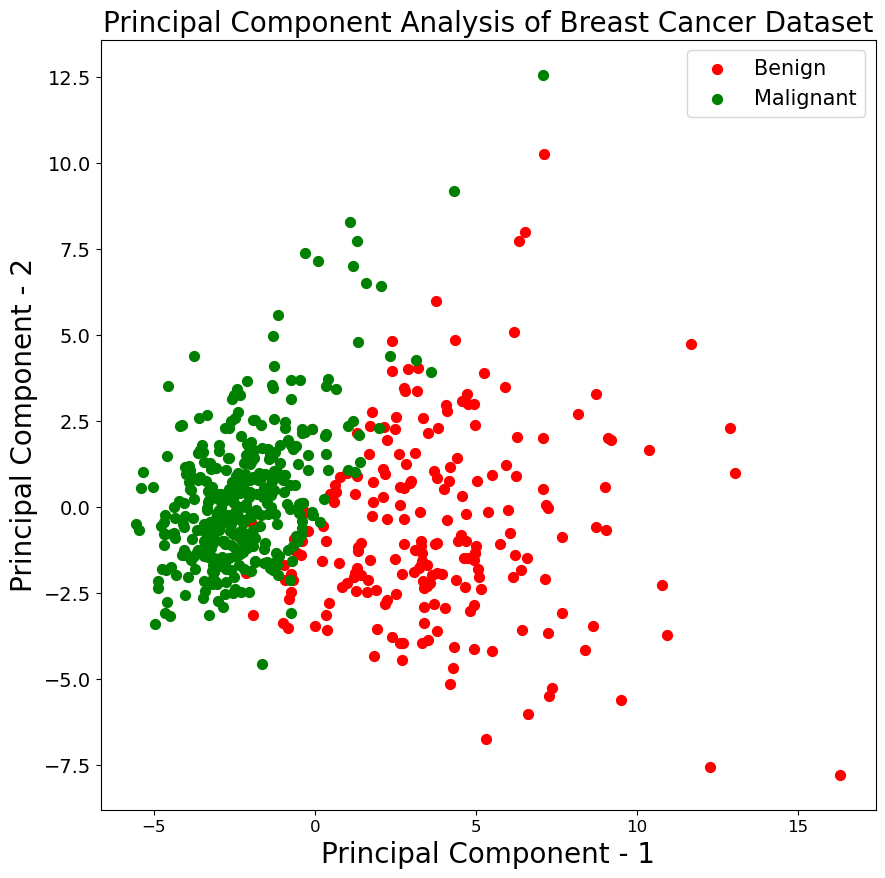

In [101]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.show()

## K Means Clustering

In [110]:
X = -2 * np.random.rand(100, 2)
X1 = 1 + 2 * np.random.rand(50, 2)
X[50:100, :] = X1

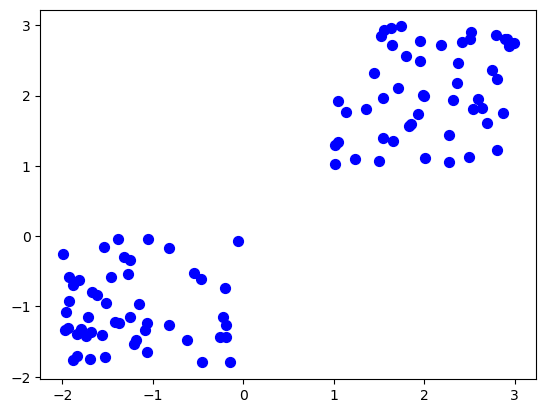

In [112]:
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'b')
plt.show()

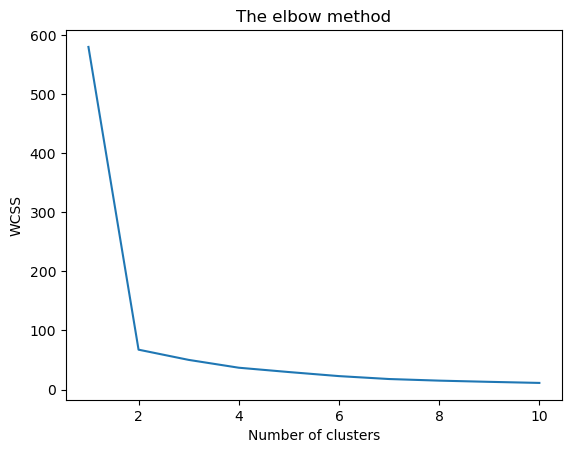

In [114]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [116]:
Kmean = KMeans(n_clusters=2, n_init=10)
Kmean.fit(X)

KMeans(n_clusters=2, n_init=10)

In [117]:
Kmean.cluster_centers_

array([[ 2.05208249,  2.05716032],
       [-1.25280516, -1.03844191]])

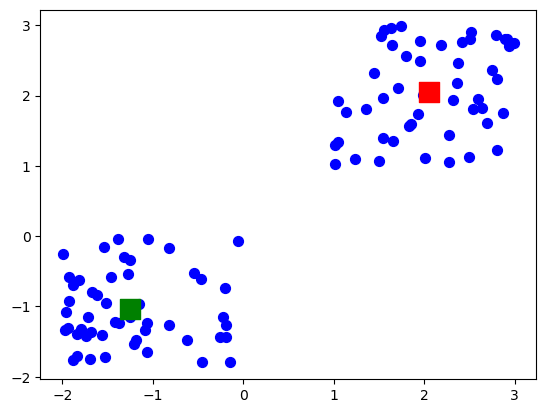

In [118]:
plt.scatter(X[:, 0], X[:, 1], s = 50, c = 'b')
plt.scatter(Kmean.cluster_centers_[0, 0], Kmean.cluster_centers_[0, 1], s = 200, c = 'r', marker="s")
plt.scatter(Kmean.cluster_centers_[1, 0], Kmean.cluster_centers_[1, 1], s = 200, c = 'g', marker="s")
plt.show()

In [120]:
data = pd.read_csv("data/Wholesale_customers_data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [122]:
data.shape

(440, 8)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [123]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [124]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [129]:
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10)

kmeans.fit(data_scaled)

KMeans(n_clusters=2, n_init=10)

In [130]:
kmeans.inertia_

2599.3844237836256

In [145]:
SSE = []

for cluster in range(1, 40):
    kmeans = KMeans(n_clusters=cluster, init="k-means++", n_init=10)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# print(SSE)

In [146]:
frame = pd.DataFrame({"Cluster": range(1, 40), "SSE": SSE})
frame.head()

,Cluster,SSE
0,1,3520.000000
1,2,2599.387385
2,3,2149.283956
3,4,1837.715058
4,5,1551.667708


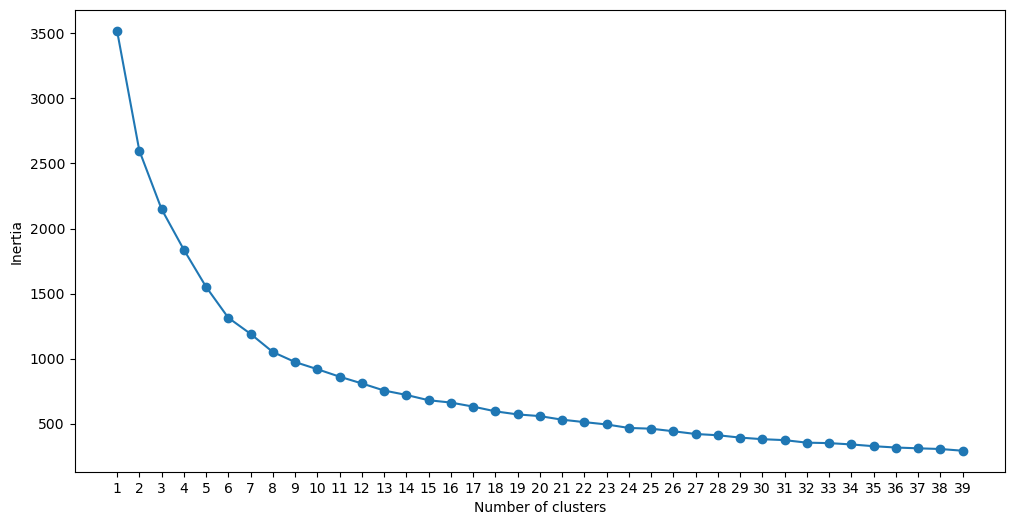

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(frame["Cluster"], frame["SSE"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, 40))
plt.show()

In [148]:
kmeans = KMeans(n_clusters=6, init="k-means++", n_init=10)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [156]:
frame = pd.DataFrame(data_scaled)
frame["cluster"] = pred
frame["cluster"].value_counts()

0    172
1    124
4     86
3     46
5     11
2      1
Name: cluster, dtype: int64

## Save and Load Models

In [159]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [160]:
# encoder
le = LabelEncoder()
oe = OrdinalEncoder()

In [166]:
features = list(zip(weather, temp))
features_encoded = oe.fit_transform(features)

label_encoded = le.fit_transform(play)

In [168]:
model = GaussianNB()

In [170]:
model.fit(features_encoded, label_encoded)

GaussianNB()

In [171]:
model.predict([[0, 2]])

array([1])

In [174]:
# save model
filename = "models/finalized_model.sav"

# # harus di close manual
# model_file = open(filename, "wb")
# pickle.dump(model, file_model)
# model_file.close()

# otomatis close 
with open(filename, "wb") as model_file:
    pickle.dump(model, model_file)

# # alternative joblib
# with open(filename, "wb") as model_file:
#     joblib.dump(model, model_file)

In [176]:
with open(filename, "rb") as model_file:
    loaded_model = pickle.load(model_file)

# # alternative joblib
# with open(filename, "rb") as model_file:
#     loaded_model = joblib.load(model_file)

In [177]:
loaded_model.predict([[0, 2]])

array([1])